## Pasos para ejecutar el programa

### 1. Se realiza la conexión y carga de datos al neo4j

In [1]:
import neo4j as neo
dataset = "dataset.xlsx"
neo.main(dataset)

### 2. Se realiza la extracción de datos y cálculos de consultas con spark y se almacena en posgresql

In [2]:
from spark import main
main()

Datos extraidos de Neo4j

+-----------+----------+------------------+
|customer_id|product_id|transaction_amount|
+-----------+----------+------------------+
|       1817|         2|            590.26|
|       2750|         2|            590.26|
|        606|         2|             71.49|
|       3111|         2|             71.49|
|       3083|         2|             71.49|
|       2537|         2|             71.49|
|       2496|         2|             71.49|
|       1035|         2|             71.49|
|        403|         2|             71.49|
|       2638|         2|             71.49|
|         45|         2|             71.49|
|        398|         2|             71.49|
|        635|         2|             71.49|
|         15|         2|             71.49|
|        554|         2|             71.49|
|       1545|         2|             71.49|
|        197|         2|            590.26|
|        442|         2|             71.49|
|       1574|         2|             71.49|
|     

### 3. Se realiza la visualización de los datos (extras)

Generando gráficos...



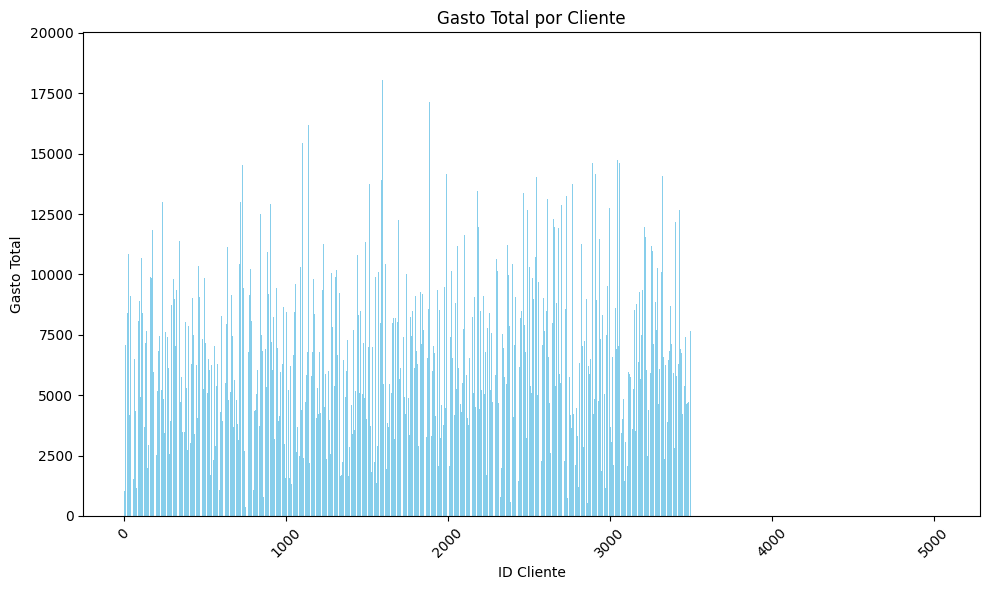

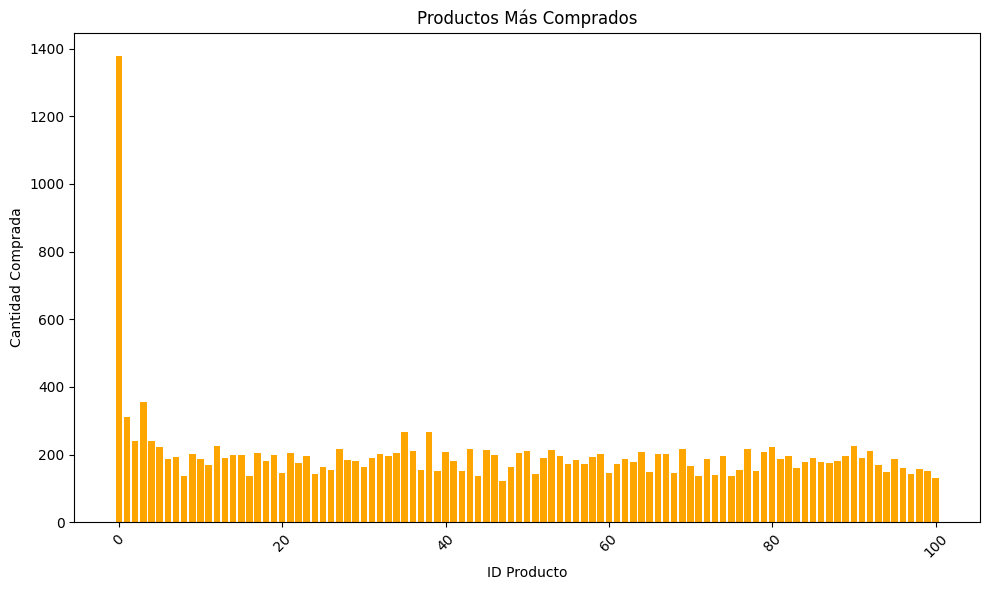

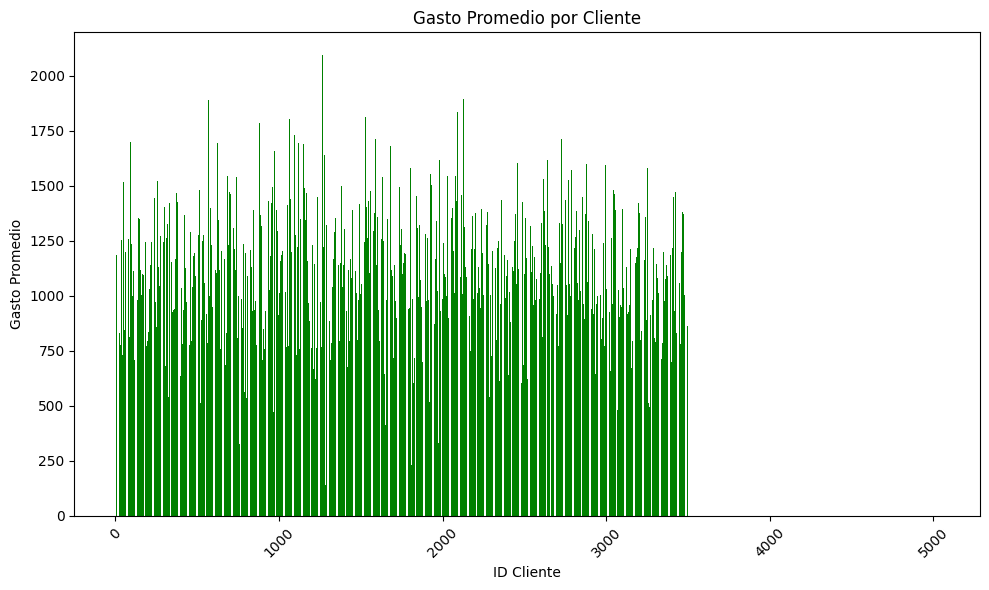

In [3]:
from postgresql import main 
main()